In [121]:
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
from pathlib import Path

In [122]:
uber_data = Path("project1-PMA/Resource/uber_rides_processed.csv")

In [123]:
uber_data_df = pd.read_csv(uber_data)

In [124]:
uber_data_df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,time,day,month,year
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07,15:52:06,7,5,2015
1,11.5,-73.965937,40.770992,-73.977657,40.762827,1,2014-10-23,05:05:47,23,10,2014
2,9.5,-74.007496,40.725907,-73.987605,40.738403,1,2013-02-28,08:32:27,28,2,2013
3,4.5,-73.974277,40.750318,-73.970525,40.756100,1,2012-07-31,10:32:50,31,7,2012
4,5.0,-73.982117,40.773972,-73.984437,40.761082,1,2012-10-22,17:52:00,22,10,2012


In [160]:
uber_clean_df = pd.DataFrame(uber_data_df.loc[uber_data_df["passenger_count"]<10,:])
uber_clean_df2 = uber_clean_df[uber_clean_df['fare_amount'] >= 5]
uber_clean_df2.tail()



,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,time,day,month,year
195323,9.0,-74.003853,40.725572,-73.996612,40.732452,6,2013-05-18,09:05:00,18,5,2013
195324,7.3,-73.994185,40.735488,-73.993408,40.721897,6,2009-01-31,16:39:00,31,1,2009
195325,18.1,-74.011528,40.708050,-73.969757,40.756427,6,2012-05-18,06:55:00,18,5,2012
195326,8.0,-74.001620,40.732312,-73.982295,40.745492,6,2013-02-28,20:36:00,28,2,2013
195327,7.5,-73.959912,40.770792,-73.951630,40.766382,6,2014-05-28,09:02:00,28,5,2014


In [161]:
df_filtered = uber_clean_df2[uber_clean_df2['year'] != 2008]

In [162]:
#Average price of fare from 2009-2015
price_increase =  df_filtered.groupby (["year"])["fare_amount"].mean()
price_increase
price_increase = df_filtered.groupby(["year"])["fare_amount"].mean()
price_increase_std = price_increase.std()
price_increase_std
price_increase_df = pd.DataFrame({"Price Increase": price_increase, "Standard Deviation": price_increase_std})
price_increase_df

,Price Increase,Standard Deviation
year,,
2009,11.327110,1.077257
2010,11.494724,1.077257
2011,11.679979,1.077257
2012,12.330538,1.077257
2013,13.430765,1.077257
2014,13.736809,1.077257
2015,13.719152,1.077257


In [163]:
#Inflation Data for NY from 2009-2015 Resource:https://www.in2013dollars.com/New-York/price-inflation
inflation_data_df = pd.DataFrame({"year": [2009,2010,2011,2012,2013,2014,2015],
                                  "Inflation %": [0.44,1.71,2.85,1.97,1.68,1.32,0.13]})
inflation_data_df


,year,Inflation %
0,2009,0.44
1,2010,1.71
2,2011,2.85
3,2012,1.97
4,2013,1.68
5,2014,1.32
6,2015,0.13


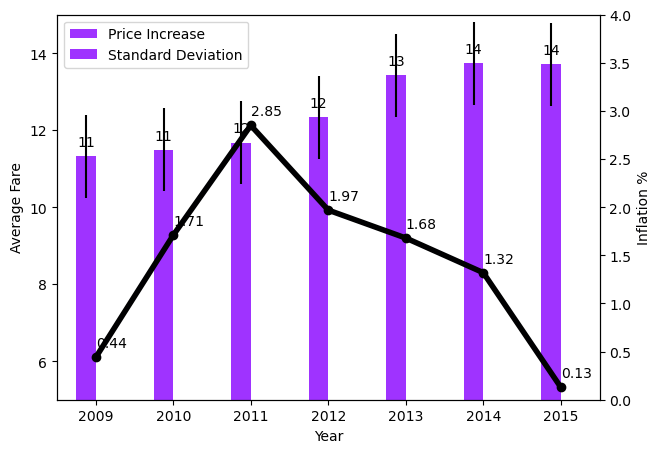

<Figure size 640x480 with 0 Axes>

In [164]:
#Reference for bar plot with line (https://drive.google.com/file/d/1DnIXoAsp6lU59pisid6Lhx4DXxXMEQft/view)

yerr = price_increase_std
ax = price_increase_df.plot(kind='bar', color="#9F33FF", figsize=(7,5),yerr=yerr)

# Set the xlabel and ylabel using class methods
ax.set_xlabel("Year")
ax.set_ylabel("Average Fare")
ax.set_ylim(5,15)

for tick in ax.get_xticklabels():

  tick.set_rotation(0)




#AX2: Create secondary y-axis with same x-axis as above for plotting percent values
ax2=ax.twinx()

ax2.plot(ax.get_xticks(),inflation_data_df["Inflation %"], color="#000001", linewidth=4, marker = "o")

ax2.grid(False)

ax2.set_ylabel("Inflation %", color = "#000001")

ax2.set_ylim(0,4.0)



# function to add details for bars and lines



def add_value_labels(ax, typ, spacing=5):
    space = spacing
    va = 'bottom'

    if typ == 'bar':
        for i in ax.patches:
            y_value = i.get_height()
            x_value = i.get_x() + i.get_width() / 2

            label = "{:.0f}".format(y_value)
            ax.annotate(label,(x_value, y_value), xytext=(0, space), 
                    textcoords="offset points", ha='center', va=va)     
    if typ == 'line':
        line = ax.lines[0]
        for x_value, y_value in zip(line.get_xdata(), line.get_ydata()):
            label = "{:.2f}".format(y_value)
            ax.annotate(label,(x_value, y_value), xytext=(0, space), 
                textcoords="offset points", ha='left', va=va, color="black")   

add_value_labels(ax, typ='bar')
add_value_labels(ax2, typ='line')
ax2.tick_params(labelcolor="black", axis='y')

plt.show()
plt.tight_layout()

In [165]:
#calculate total number of rider increase year on year from 2009 - 2015 
ride_year = df_filtered.groupby (["year"])["pickup_latitude"].count()

ride_year_df = pd.DataFrame(ride_year)
ride_year_df.reset_index(inplace=True)

ride_year = []

for i in range(1, len(ride_year_df)):
    increase = ((ride_year_df["pickup_latitude"].iloc[i] - ride_year_df["pickup_latitude"].iloc[i-1]) / ride_year_df["pickup_latitude"].iloc[i-1]) * 100
    ride_year.append(increase)

ride_year_df = pd.DataFrame({"year": ride_year_df["year"].iloc[1:],
                                  "Rides Increase per year": ride_year})
ride_year_df

,year,Rides Increase per year
1,2010,-2.293802
2,2011,6.247919
3,2012,5.954946
4,2013,4.189314
5,2014,-4.276386
6,2015,-53.850146


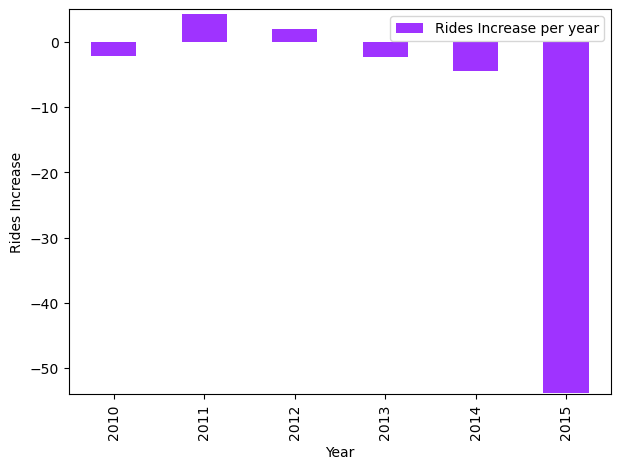

<Figure size 640x480 with 0 Axes>

In [131]:
ride_year_barchart = ride_year_df.plot(x='year', y='Rides Increase per year', kind='bar', color = "#9F33FF",  figsize=(7,5))

# Set the xlabel and ylabel using class methods
ride_year_barchart.set_xlabel("Year")
ride_year_barchart.set_ylabel("Rides Increase")
ride_year_barchart.set_ylim(-54,5)
plt.show()
plt.tight_layout()

In [132]:
years = df_filtered["year"].unique()
years

array([2015, 2014, 2013, 2012, 2010, 2009, 2011], dtype=int64)

In [133]:
df_filtered.tail(25000)


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,time,day,month,year
170326,9.3,-73.979257,40.752562,-73.983445,40.726450,3,2012-03-05,16:08:00,5,3,2012
170327,4.5,-73.992410,40.748943,-73.992242,40.742697,3,2012-11-12,12:07:00,12,11,2012
170328,4.5,-73.985913,40.762263,-73.988265,40.769645,3,2009-09-14,12:03:00,14,9,2009
170329,5.3,-74.012244,40.703427,-74.010147,40.712226,3,2009-10-26,19:23:32,26,10,2009
170330,6.9,-73.988757,40.739515,-73.990217,40.750317,3,2009-04-25,15:48:00,25,4,2009
...,...,...,...,...,...,...,...,...,...,...,...
195323,9.0,-74.003853,40.725572,-73.996612,40.732452,6,2013-05-18,09:05:00,18,5,2013
195324,7.3,-73.994185,40.735488,-73.993408,40.721897,6,2009-01-31,16:39:00,31,1,2009
195325,18.1,-74.011528,40.708050,-73.969757,40.756427,6,2012-05-18,06:55:00,18,5,2012
195326,8.0,-74.001620,40.732312,-73.982295,40.745492,6,2013-02-28,20:36:00,28,2,2013


In [166]:
#Set Single or Poll rides types
#df_filtered = csv filtered out 2008 data and passenger outliner "208"
bins = [1,2,6]  # Add an additional bin edge
n_passenger_groups = ["Single", "Poll"]  # Adjust the bin labels accordingly

df_filtered.loc[:, 'passenger_count_groups'] = pd.cut(df_filtered['passenger_count'], bins, labels=n_passenger_groups, include_lowest=True)

df_filtered.tail()

C:\Users\patricia.deassis\AppData\Local\Temp\ipykernel_20548\3880481859.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'passenger_count_groups'] = pd.cut(df_filtered['passenger_count'], bins, labels=n_passenger_groups, include_lowest=True)


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,time,day,month,year,passenger_count_groups
195323,9.0,-74.003853,40.725572,-73.996612,40.732452,6,2013-05-18,09:05:00,18,5,2013,Poll
195324,7.3,-73.994185,40.735488,-73.993408,40.721897,6,2009-01-31,16:39:00,31,1,2009,Poll
195325,18.1,-74.011528,40.708050,-73.969757,40.756427,6,2012-05-18,06:55:00,18,5,2012,Poll
195326,8.0,-74.001620,40.732312,-73.982295,40.745492,6,2013-02-28,20:36:00,28,2,2013,Poll
195327,7.5,-73.959912,40.770792,-73.951630,40.766382,6,2014-05-28,09:02:00,28,5,2014,Poll


In [167]:
Single_df = pd.DataFrame(df_filtered.loc[df_filtered['passenger_count_groups']== "Single",:])
Single_year_df = pd.DataFrame(Single_df.groupby("year")["passenger_count_groups"].size())
Single_year_df

,passenger_count_groups
year,
2009,20651
2010,20160
2011,21434
2012,22735
2013,23594
2014,22717
2015,10518


In [169]:
Poll_df = pd.DataFrame(df_filtered.loc[df_filtered['passenger_count_groups']== "Poll",:])
Poll_year_df = pd.DataFrame(Poll_df.groupby("year")["passenger_count_groups"].size())
Poll_year_df

,passenger_count_groups
year,
2009,3937
2010,3864
2011,4091
2012,4310
2013,4584
2014,4256
2015,1930


In [170]:
Total_rides_df = pd.DataFrame(df_filtered.groupby("year")["passenger_count"].size())
Total_rides_df

,passenger_count
year,
2009,24588
2010,24024
2011,25525
2012,27045
2013,28178
2014,26973
2015,12448


In [171]:
#Merge the two DataFrames on the 'year' column
merged_df = Poll_year_df.merge(Total_rides_df, on='year')
merged_df

merged_df_2 = Single_year_df.merge(Total_rides_df, on='year')
merged_df_2
# Calculate the percentage of rides for each passenger count group in each year
Percentage_Poll = (merged_df['passenger_count_groups'] / merged_df['passenger_count']) * 100
Percentage_Poll
Percentage_Single = (merged_df_2['passenger_count_groups'] / merged_df_2['passenger_count']) * 100
Percentage_Single

year
2009    83.988124
2010    83.916084
2011    83.972576
2012    84.063598
2013    83.731989
2014    84.221258
2015    84.495501
dtype: float64

In [173]:
percent_year = {"% Over 1 Passenger":Percentage_Poll, "%Single Rides":Percentage_Single }
percent_year
percent_year = pd.DataFrame(data=percent_year)
percent_year

,% Over 1 Passenger,%Single Rides
year,,
2009,16.011876,83.988124
2010,16.083916,83.916084
2011,16.027424,83.972576
2012,15.936402,84.063598
2013,16.268011,83.731989
2014,15.778742,84.221258
2015,15.504499,84.495501


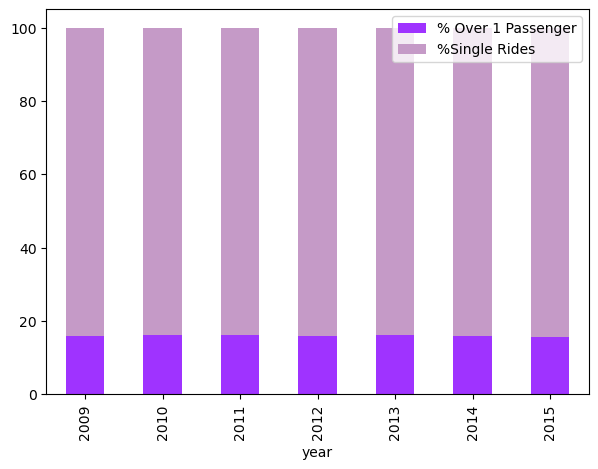

In [174]:
color = ["#9F33FF", "#C59AC7"]
percent_year.plot(kind='bar', color = color, stacked=True, figsize=(7,5))

plt.show()



In [141]:
#Winter: December to March
#Spring: March to June
#Summer: June to September
#Autumn: September to December

#DEFINE RELATIONSHIP BETWEEN SEASONS AND NUMBER OF RIDES

In [178]:
season_dict = {1: 'Winter',
               2: 'Winter',
               3: 'Spring',
               4: 'Spring',
               5: 'Spring',
               6: 'Summer',
               7: 'Summer',
               8: 'Summer',
               9: 'Fall',
               10: 'Fall',
               11: 'Fall',
               12: 'Winter'}
df_filtered.loc[:, 'Season'] = df_filtered['month'].apply(lambda x: season_dict.get(x))
df_filtered

C:\Users\patricia.deassis\AppData\Local\Temp\ipykernel_20548\3977620639.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.loc[:, 'Season'] = df_filtered['month'].apply(lambda x: season_dict.get(x))


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,time,day,month,year,passenger_count_groups,Season
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07,15:52:06,7,5,2015,Single,Spring
1,11.5,-73.965937,40.770992,-73.977657,40.762827,1,2014-10-23,05:05:47,23,10,2014,Single,Fall
2,9.5,-74.007496,40.725907,-73.987605,40.738403,1,2013-02-28,08:32:27,28,2,2013,Single,Winter
4,5.0,-73.982117,40.773972,-73.984437,40.761082,1,2012-10-22,17:52:00,22,10,2012,Single,Fall
5,9.0,-73.961419,40.801307,-73.954290,40.778945,1,2013-01-21,13:11:32,21,1,2013,Single,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195323,9.0,-74.003853,40.725572,-73.996612,40.732452,6,2013-05-18,09:05:00,18,5,2013,Poll,Spring
195324,7.3,-73.994185,40.735488,-73.993408,40.721897,6,2009-01-31,16:39:00,31,1,2009,Poll,Winter
195325,18.1,-74.011528,40.708050,-73.969757,40.756427,6,2012-05-18,06:55:00,18,5,2012,Poll,Spring
195326,8.0,-74.001620,40.732312,-73.982295,40.745492,6,2013-02-28,20:36:00,28,2,2013,Poll,Winter


In [179]:
#Total Number of rides by season from 2009-2015
Total_season = df_filtered.groupby("Season")["passenger_count"].sum()
Total_season

Season
Fall      67843
Spring    79824
Summer    67769
Winter    71280
Name: passenger_count, dtype: int64

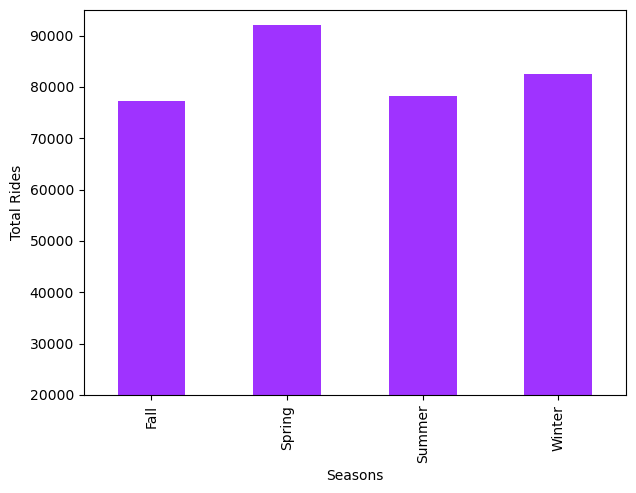

<Figure size 640x480 with 0 Axes>

In [152]:
Total_season_barchart = Total_season.plot(kind='bar', color = "#9F33FF", figsize=(7,5))

# Set the xlabel and ylabel using class methods
Total_season_barchart.set_xlabel("Seasons")
Total_season_barchart.set_ylabel("Total Rides")
Total_season_barchart.set_ylim(20000,95000)
plt.show()
plt.tight_layout()

In [180]:
#Average price per season

price_season = df_filtered.groupby("Season")["fare_amount"].mean()
price_season

Season
Fall      12.805452
Spring    12.478957
Summer    12.479592
Winter    12.162147
Name: fare_amount, dtype: float64

In [181]:
Single_s_df = pd.DataFrame(df_filtered.loc[df_filtered['passenger_count_groups']== "Single",:])
Single_season_df = pd.DataFrame(Single_s_df.groupby("Season")["passenger_count_groups"].size())
Single_season_df

,passenger_count_groups
Season,
Fall,33543
Spring,40041
Summer,33139
Winter,35086


In [182]:
Poll_s_df = pd.DataFrame(df_filtered.loc[df_filtered['passenger_count_groups']== "Poll",:])
Poll_season_df = pd.DataFrame(Poll_s_df.groupby("Season")["pickup_latitude"].size())
Poll_season_df

,pickup_latitude
Season,
Fall,6367
Spring,7377
Summer,6509
Winter,6719


In [183]:
Total_season_df = pd.DataFrame(df_filtered.groupby("Season")["passenger_count"].size())
Total_season_df

,passenger_count
Season,
Fall,39910
Spring,47418
Summer,39648
Winter,41805


In [184]:
merged_df_3 = Total_season_df.merge(Poll_season_df, on='Season')
merged_df_3
merged_df_4 = Single_season_df.merge(merged_df_3, on='Season')
merged_df_4
#merge_season = {"Total - Over 1 Passenger":Poll_season_df, "Total -Single Rides":Single_season_df, "Total rides": Total_season_df}
#merge_season


,passenger_count_groups,passenger_count,pickup_latitude
Season,,,
Fall,33543,39910,6367
Spring,40041,47418,7377
Summer,33139,39648,6509
Winter,35086,41805,6719


In [185]:
Percentage_Poll_season = (merged_df_4['pickup_latitude'] / merged_df_4['passenger_count']) * 100
Percentage_Poll_season
Percentage_Single_season = (merged_df_4['passenger_count_groups'] / merged_df_4['passenger_count']) * 100
Percentage_Single_season

Season
Fall      84.046605
Spring    84.442617
Summer    83.583031
Winter    83.927760
dtype: float64

In [186]:
percent_season = {"% Over 1 Passenger":Percentage_Poll_season, "%Single Rides":Percentage_Single_season }
percent_season
percent_season = pd.DataFrame(data=percent_season)
percent_season

,% Over 1 Passenger,%Single Rides
Season,,
Fall,15.953395,84.046605
Spring,15.557383,84.442617
Summer,16.416969,83.583031
Winter,16.072240,83.927760
